# **Eda**

## 1. Data agregation

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
from sklearn.model_selection import train_test_split

In [2]:
DATA_NAMES = os.listdir('./datasets')

In [3]:
print(f'Total: {len(DATA_NAMES)}') 
print(f'Data names: {DATA_NAMES}') 

Total: 9
Data names: ['D_loan.csv', 'D_clients.csv', 'D_last_credit.csv', 'D_pens.csv', 'D_salary.csv', 'D_target.csv', 'D_work.csv', 'D_job.csv', 'D_close_loan.csv']


In [4]:
df_dict = {
    k.split('.')[0]: pd.read_csv('datasets/' + k)
    for k in DATA_NAMES
}

In [5]:
for (idx, data_name) in enumerate(df_dict.keys()):
    print(f'DATA NUMBER: {idx+1}')
    print(f'DATA_NAME: {data_name}')
    display(df_dict[data_name].head())
    print('Short data description:')
    display(df_dict[data_name].info())
    display(df_dict[data_name].nunique())
    

DATA NUMBER: 1
DATA_NAME: D_loan


,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    21126 non-null  int64
 1   ID_CLIENT  21126 non-null  int64
dtypes: int64(2)
memory usage: 330.2 KB


None

ID_LOAN      21126
ID_CLIENT    15223
dtype: int64

DATA NUMBER: 2
DATA_NAME: D_clients


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16000 non-null  int64 
 1   AGE                      16000 non-null  int64 
 2   GENDER                   16000 non-null  int64 
 3   EDUCATION                16000 non-null  object
 4   MARITAL_STATUS           16000 non-null  object
 5   CHILD_TOTAL              16000 non-null  int64 
 6   DEPENDANTS               16000 non-null  int64 
 7   SOCSTATUS_WORK_FL        16000 non-null  int64 
 8   SOCSTATUS_PENS_FL        16000 non-null  int64 
 9   REG_ADDRESS_PROVINCE     16000 non-null  object
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object
 12  FL_PRESENCE_FL           16000 non-null  int64 
 13  OWN_AUTO                 16000 non-null  int64 
dtypes: int64(9), o

None

ID                         16000
AGE                           47
GENDER                         2
EDUCATION                      7
MARITAL_STATUS                 5
CHILD_TOTAL                   10
DEPENDANTS                     8
SOCSTATUS_WORK_FL              2
SOCSTATUS_PENS_FL              2
REG_ADDRESS_PROVINCE          81
FACT_ADDRESS_PROVINCE         81
POSTAL_ADDRESS_PROVINCE       80
FL_PRESENCE_FL                 2
OWN_AUTO                       3
dtype: int64

DATA NUMBER: 3
DATA_NAME: D_last_credit


,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CREDIT       15223 non-null  float64
 1   TERM         15223 non-null  int64  
 2   FST_PAYMENT  15223 non-null  float64
 3   ID_CLIENT    15223 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 475.8 KB


None

CREDIT          8029
TERM              22
FST_PAYMENT     2937
ID_CLIENT      15223
dtype: int64

DATA NUMBER: 4
DATA_NAME: D_pens


,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       2 non-null      int64 
 1   FLAG     2 non-null      int64 
 2   COMMENT  2 non-null      object
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


None

ID         2
FLAG       2
COMMENT    2
dtype: int64

DATA NUMBER: 5
DATA_NAME: D_salary


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FAMILY_INCOME    15523 non-null  object 
 1   PERSONAL_INCOME  15523 non-null  float64
 2   ID_CLIENT        15523 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 363.9+ KB


None

FAMILY_INCOME          5
PERSONAL_INCOME      274
ID_CLIENT          15223
dtype: int64

DATA NUMBER: 6
DATA_NAME: D_target


,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGREEMENT_RK  15223 non-null  int64
 1   ID_CLIENT     15223 non-null  int64
 2   TARGET        15223 non-null  int64
dtypes: int64(3)
memory usage: 356.9 KB


None

AGREEMENT_RK    15223
ID_CLIENT       15223
TARGET              2
dtype: int64

DATA NUMBER: 7
DATA_NAME: D_work


,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       3 non-null      int64 
 1   FLAG     3 non-null      int64 
 2   COMMENT  3 non-null      object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


None

ID         3
FLAG       3
COMMENT    3
dtype: int64

DATA NUMBER: 8
DATA_NAME: D_job


,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GEN_INDUSTRY  13856 non-null  object 
 1   GEN_TITLE     13856 non-null  object 
 2   JOB_DIR       13856 non-null  object 
 3   WORK_TIME     13855 non-null  float64
 4   ID_CLIENT     15223 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 594.8+ KB


None

GEN_INDUSTRY       31
GEN_TITLE          12
JOB_DIR            10
WORK_TIME         302
ID_CLIENT       15223
dtype: int64

DATA NUMBER: 9
DATA_NAME: D_close_loan


,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


Short data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    21126 non-null  int64
 1   CLOSED_FL  21126 non-null  int64
dtypes: int64(2)
memory usage: 330.2 KB


None

ID_LOAN      21126
CLOSED_FL        2
dtype: int64

**The datasets contain:**

1. `D_loan`: information about `21126` loans from `15223` clients.
2. `D_clients`: information about social features of `16000` clients.
3. `D_last_credit`: information abot loan details related to `15223` clients.
4. `D_pens`: dataset with for encoding retirement status. (0 — retirement=True, 1 - retirement=False)
5. `D_salary`: dataset with family and personal income of `15223` clients.
6. `D_target`: dataset with target feature to `15223` clients.
7. `D_work`: dataset with for encoding work status. (0 — works=True, 1 - works=False, 2 — works=None)
8. `D_job`: information about work of `15223` clients, contains NANs
9. `D_close_loan`: infromation about loan closing status. 

## 2. Data merging

- It is necessary to separate the data connection by the ID_LOAN and ID_CLIENT key
- Data with ID_CLIENT key: `D_loan`, `D_clients`, `D_last_credit`, `D_salary`, `D_target`, `D_job`
- Data with ID_LOAN key: `D_loan`, `D_close_loan`

Merging steps:

**First:** Merging and features extracting using ID_LOAN.

1) Left merge loan code `D_loan` and loan status `D_close_loan` data, left because we can have old data about the closing of the loan -> `loans_merged_df`
2) Extracting features about total conut of loans and total count of closed loans for each client -> `loans_df`

**Second:** Merging and features extracting using ID_CLIENT.

1) Left merge target `D_target` and last loan details data `D_last_credit`, because to train our model we need information about clients with target feature -> general_df
2)  Left merge `general_df` and social fetures `D_clients` -> general_df
3)  Outer merge `general_df`  and personal income `D_salary` data -> general_df
4)  Outer merge `general_df` and work status `D_job` data -> general_df

We use left merge in steps 1-4, because we need information ONLY about clients with target feature 

**Third:**

1) Left merge `general_df` and `loans_df`,  because we need information ONLY loans clients with target feature 

In [6]:
#ID_LOAN
loans_merged_df = df_dict['D_loan'].merge(df_dict['D_close_loan'], how='left', on='ID_LOAN')

#EXTRAXTING FEATURES

loans_df = loans_merged_df.groupby('ID_CLIENT').agg({'CLOSED_FL' : 'sum', 'ID_LOAN' : 'count'})
loans_df.columns = ['closed_loans_count', 'total_loans_count']

loans_df.reset_index(inplace=True)

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID_CLIENT           15223 non-null  int64
 1   closed_loans_count  15223 non-null  int64
 2   total_loans_count   15223 non-null  int64
dtypes: int64(3)
memory usage: 356.9 KB


In [7]:
#ID_CLIENT

#Correction of the key in the data about social features
d_clients_columns_list = list(df_dict['D_clients'].columns)
d_clients_columns_list[0] = 'ID_CLIENT'

df_dict['D_clients'].columns = d_clients_columns_list

#Data merging

general_df = df_dict['D_target'].merge(df_dict['D_last_credit'], how='left', on='ID_CLIENT') # joined target and loan details data

general_df = general_df.merge(df_dict['D_clients'], how='left', on='ID_CLIENT') # joined social features and loan details

general_df = general_df.merge(df_dict['D_salary'], how='left', on='ID_CLIENT') # joined general_df and income details
general_df = general_df.merge(df_dict['D_job'], how='left', on='ID_CLIENT')# joined work status data

#general_df.info()

In [8]:
#LOANS AND CLIENTS DATA MERGING

general_df = general_df.merge(loans_df, on='ID_CLIENT', how='left')

general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGREEMENT_RK             15523 non-null  int64  
 1   ID_CLIENT                15523 non-null  int64  
 2   TARGET                   15523 non-null  int64  
 3   CREDIT                   15523 non-null  float64
 4   TERM                     15523 non-null  int64  
 5   FST_PAYMENT              15523 non-null  float64
 6   AGE                      15523 non-null  int64  
 7   GENDER                   15523 non-null  int64  
 8   EDUCATION                15523 non-null  object 
 9   MARITAL_STATUS           15523 non-null  object 
 10  CHILD_TOTAL              15523 non-null  int64  
 11  DEPENDANTS               15523 non-null  int64  
 12  SOCSTATUS_WORK_FL        15523 non-null  int64  
 13  SOCSTATUS_PENS_FL        15523 non-null  int64  
 14  REG_ADDRESS_PROVINCE  

Data Merging Conclusions:

1) We have `15223` samples with `27` features. (First of all, we need to remove the features that are unique for each client - ID_CLIENT, AGREEMENT_RK).
2) We dont have information about working status of 1098 clients.
3) We have string features that need to be encoded or we need use model that can handle string features.

## 3. Data Analysis

1. Duplicates and extra columns.

In [9]:
#Checking for duplicates
print(f'Total count of duplicates: {general_df.duplicated().sum()}')

Total count of duplicates: 300


In [10]:
#Removing duplicates
general_df.drop_duplicates(inplace=True)

#general_df.duplicated().sum()

In [11]:
#Cheking for unique values in the each columns 
general_df.nunique()

AGREEMENT_RK               15223
ID_CLIENT                  15223
TARGET                         2
CREDIT                      8029
TERM                          22
FST_PAYMENT                 2937
AGE                           47
GENDER                         2
EDUCATION                      7
MARITAL_STATUS                 5
CHILD_TOTAL                   10
DEPENDANTS                     8
SOCSTATUS_WORK_FL              2
SOCSTATUS_PENS_FL              2
REG_ADDRESS_PROVINCE          81
FACT_ADDRESS_PROVINCE         81
POSTAL_ADDRESS_PROVINCE       80
FL_PRESENCE_FL                 2
OWN_AUTO                       3
FAMILY_INCOME                  5
PERSONAL_INCOME              274
GEN_INDUSTRY                  31
GEN_TITLE                     12
JOB_DIR                       10
WORK_TIME                    302
closed_loans_count            10
total_loans_count              9
dtype: int64

In [12]:
#Removing columns with unique values
general_df.drop(['AGREEMENT_RK', 'ID_CLIENT'], axis=1, inplace=True)

#Chek that all is correct and that we dont have new duplicates

print(('AGREEMENT_RK' or 'ID_CLIENT') in list(general_df.columns))
print(f'Total count of duplicates: {general_df.duplicated().sum()}')

2. Feature Analysis

In [13]:
pd.set_option('display.max_columns', 100)

general_df.columns = [i.lower() for i in general_df.columns]
general_df.head()

,target,credit,term,fst_payment,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,closed_loans_count,total_loans_count
0,0,8000.00,6,8650.0,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,1,1
2,0,21650.00,6,4000.0,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,1,1
3,0,33126.00,12,4000.0,52,1,Неполное среднее,Состою в браке,4,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,1,2
4,0,8491.82,6,5000.0,39,1,Высшее,Состою в браке,1,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0,от 20000 до 50000 руб.,25000.0,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,1,1
5,0,21990.00,12,4000.0,30,0,Среднее,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,от 10000 до 20000 руб.,12000.0,Государственная служба,Специалист,Участие в основ. деятельности,101.0,1,2


In [14]:
continuous_features = ['credit', 'fst_payment', 'age', 'child_total', 'dependants', 
                       'own_auto', 'personal_income', 'work_time', 'closed_loans_count', 'total_loans_count']

categorical_features = [i for i in general_df.columns if i not in continuous_features]

2.1. Continuous features analysis

/var/folders/97/cn0tzgm16wq1pvpg99pl3w8h0000gn/T/ipykernel_40993/944186979.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  general_df[continuous_features].hist(ax=ax);


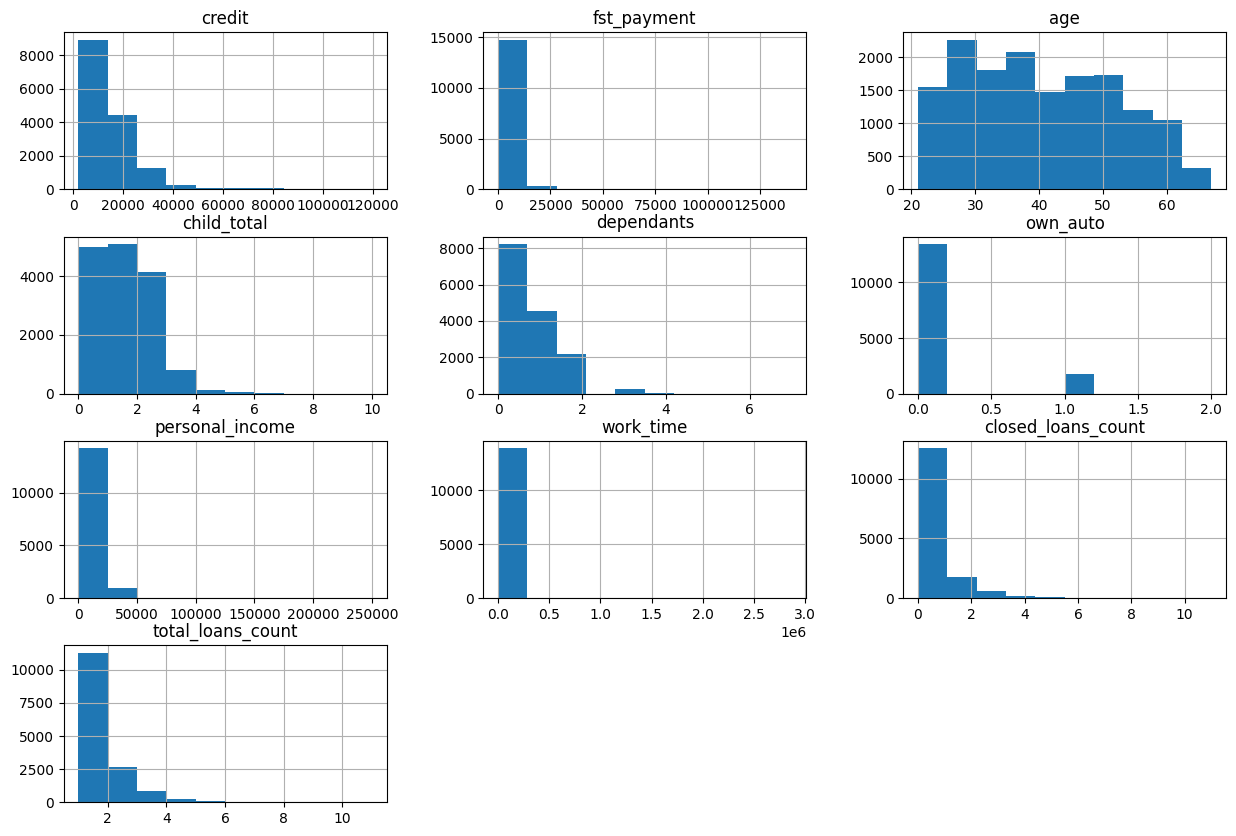

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 10))

general_df[continuous_features].hist(ax=ax);

There may be outliers in `work_time`.

In [16]:
general_df['work_time'].max()

2867959.0

In [17]:
work_time_mean = general_df['work_time'].mean()
work_time_median = general_df['work_time'].median()

print(f'Work time mean: {work_time_mean}, work time median: {work_time_median}')

Work time mean: 292.21198123421146, work time median: 48.0


In [18]:
work_time_99quantile = general_df['work_time'].quantile(0.99)
general_df.query('work_time > @work_time_99quantile').head(7)

,target,credit,term,fst_payment,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,closed_loans_count,total_loans_count
177,0,3350.0,4,1000.0,66,1,Среднее специальное,Вдовец/Вдова,1,0,1,1,Тамбовская область,Тамбовская область,Тамбовская область,1,0,от 5000 до 10000 руб.,9300.0,Здравоохранение,Рабочий,Участие в основ. деятельности,468.0,1,1
248,0,6720.0,6,800.0,60,0,Среднее специальное,Состою в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0,от 20000 до 50000 руб.,11000.0,Сельское хозяйство,Рабочий,Участие в основ. деятельности,480.0,1,1
400,0,17531.0,10,7185.0,62,1,Среднее специальное,Разведен(а),2,0,1,0,Томская область,Томская область,Томская область,0,0,от 20000 до 50000 руб.,23000.0,Коммунальное хоз-во/Дорожные службы,Руководитель высшего звена,Участие в основ. деятельности,432.0,0,1
517,0,21390.0,6,15000.0,60,1,Высшее,Вдовец/Вдова,3,0,1,0,Вологодская область,Вологодская область,Вологодская область,0,0,от 10000 до 20000 руб.,15000.0,Образование,Специалист,Участие в основ. деятельности,480.0,1,1
688,0,3590.0,6,400.0,53,0,Среднее специальное,Разведен(а),3,0,1,0,Оренбургская область,Оренбургская область,Оренбургская область,1,0,от 5000 до 10000 руб.,5000.0,ЧОП/Детективная д-ть,Работник сферы услуг,Участие в основ. деятельности,780.0,1,1
785,0,21330.0,12,2370.0,58,0,Среднее,Состою в браке,1,1,1,1,Читинская область,Читинская область,Читинская область,0,0,от 10000 до 20000 руб.,13000.0,Металлургия/Промышленность/Машиностроение,Специалист,Участие в основ. деятельности,480.0,0,1
830,0,12290.9,6,2000.0,57,1,Среднее специальное,Состою в браке,0,0,1,0,Самарская область,Самарская область,Самарская область,1,0,от 20000 до 50000 руб.,14500.0,Другие сферы,Рабочий,Участие в основ. деятельности,456.0,1,1


We may notice that the feature `work_time` (duration of work at the current place in months) may be filled incorrectly. Let's translate months into years and look at samples where the work experience exceeds the value of the person's age - 16. And we assume that the None values ​​mean that the person has been working for less than a month or not working.

But first, we will create a test sample so that testing the model is as correct as possible.

In [19]:
#New feature
general_df['work_time_in_years'] = general_df['work_time'] // 12

general_df['work_time_in_years'].fillna(0, inplace=True)

continuous_features.append('work_time_in_years')
#train test split

general_df_train, general_df_test = train_test_split(general_df, random_state=42, test_size=0.25)

In [20]:
general_df_train_cleaned = general_df_train[general_df_train['age'] - 16 >= general_df_train['work_time_in_years']]

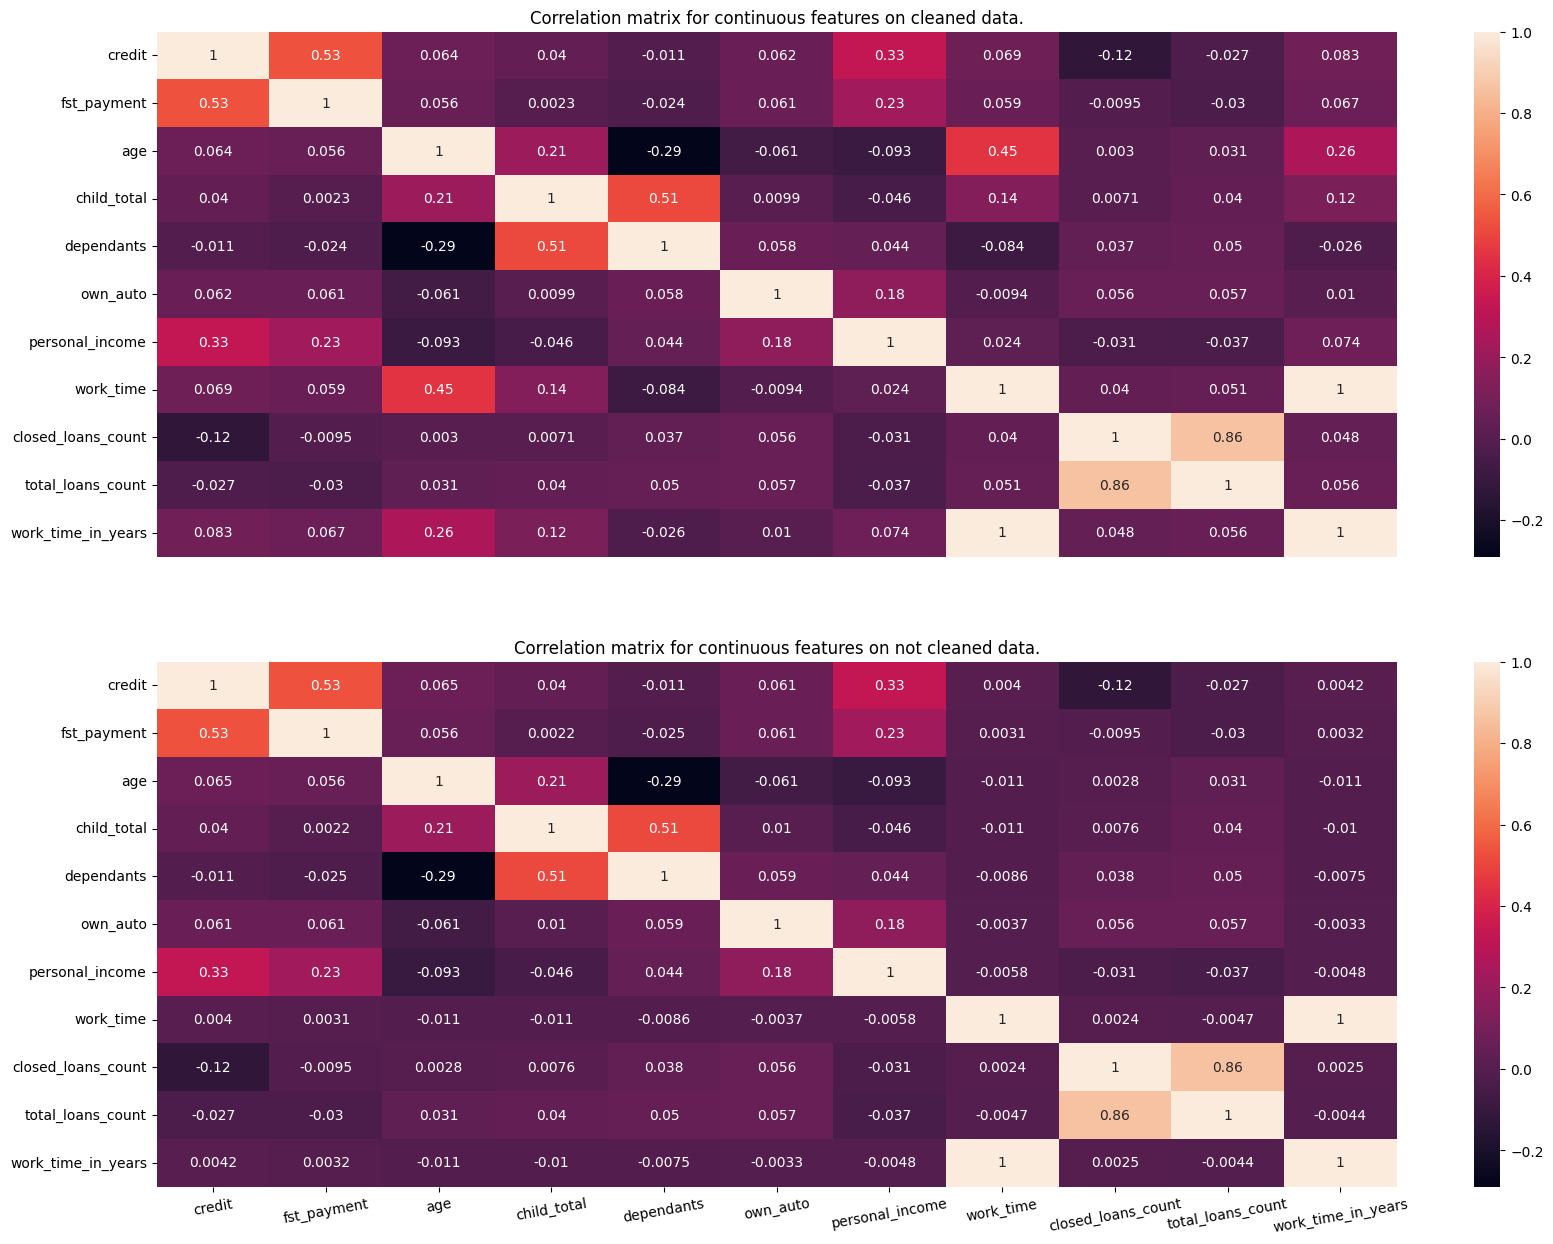

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

sns.heatmap(general_df_train_cleaned[continuous_features].corr(), annot=True, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_title('Correlation matrix for continuous features on cleaned data.')

sns.heatmap(general_df_train[continuous_features].corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation matrix for continuous features on not cleaned data.')

plt.xticks(rotation=10);

1. Credit sum (`credit`) and size of the first payment (`fst_payment`) are medium correlated `0.53`
2. Closed loans count (`closed_loans_count`) and total loans count (`total_loans_count `) are high correlated (`0.83`)
3. The removal of incorrect values led to the average correlation between the variables `work_time` and `yers`
4. Work time in months (`work_time`) and work time in years (`work_time_in_years`) are linearly related to each other (it's correct, because we make one feature from other feature). In future we need to thoose one of them. 

2.1.2 Continuous features and target feature.

In [47]:
general_df[continuous_features + ['target']]

,credit,fst_payment,age,child_total,dependants,own_auto,personal_income,work_time,closed_loans_count,total_loans_count,work_time_in_years,target
0,8000.00,8650.0,49,2,1,0,5000.0,18.0,1,1,1.0,0
2,21650.00,4000.0,32,3,3,0,12000.0,97.0,1,1,8.0,0
3,33126.00,4000.0,52,4,0,0,9000.0,84.0,1,2,7.0,0
4,8491.82,5000.0,39,1,1,0,25000.0,168.0,1,1,14.0,0
5,21990.00,4000.0,30,0,0,0,12000.0,101.0,1,2,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15518,13450.00,1500.0,25,1,1,0,12000.0,48.0,2,3,4.0,0
15519,8991.00,4000.0,51,2,0,0,10000.0,156.0,0,1,13.0,0
15520,2700.00,800.0,22,1,1,0,6000.0,48.0,0,1,4.0,0
15521,24357.00,17930.0,60,2,0,0,4500.0,NaN,0,1,0.0,0


In [52]:
from scipy.stats import kruskal, mannwhitneyu

Kruskal hypotises:

H0 — The median is the same for both groups. \
H1 - The median isn't same for both groups.

Mann-Whitney hypotises:

H0 - The distributions in the two groups are equal. \
H1 — The distributions in the two groups are not equal.

In [74]:
pvalues_dict = {}

for i in continuous_features:

    
    group1 = general_df.query('target == 1')[i].dropna()
    group2 = general_df.query('target == 0')[i].dropna()

    _k, pvalue_kruskal = kruskal(group1, group2)
    _m, pvalue_mw = mannwhitneyu(group1, group2)

    pvalues_dict[i] = [pvalue_mw, pvalue_kruskal]

    
pvalues_data = pd.DataFrame(pvalues_dict).T
pvalues_data.columns = ['mannw_pvalue', 'kruskal_pvalue']

pvalues_data['H0_is_incorrest_mw'] = (pvalues_data['mannw_pvalue'] < 0.05).astype(int)
pvalues_data['H0_is_incorrest_kruskal'] = (pvalues_data['kruskal_pvalue'] < 0.05).astype(int)

In [75]:
pvalues_data

,mannw_pvalue,kruskal_pvalue,H0_is_incorrest_mw,H0_is_incorrest_kruskal
credit,3.948704e-04,3.948662e-04,1,1
fst_payment,6.392698e-09,6.392589e-09,1,1
age,1.281831e-35,1.281786e-35,1,1
child_total,3.571920e-01,3.571905e-01,0,0
dependants,8.855311e-09,8.855145e-09,1,1
own_auto,9.322347e-03,9.322208e-03,1,1
personal_income,2.443685e-35,2.443598e-35,1,1
work_time,1.067366e-22,1.067332e-22,1,1
closed_loans_count,6.823543e-18,6.823357e-18,1,1
total_loans_count,3.082028e-06,3.081972e-06,1,1
